### Generic Mesh Generation

#### Packages needed

In [20]:
import numpy as np
import pygmsh
import sys
!{sys.executable} -m pip install -q -U numpy-stl
from stl import mesh
from matplotlib import pyplot
from mpl_toolkits import mplot3d

#### Mesh gen.

In [22]:
with pygmsh.geo.Geometry() as geom:
    geom.add_polygon(
        [
            [0.0, 0.0],
            [10.0, 0.0],
            [10.0, 1.0],
            [0.0, 1.0],
        ],
        mesh_size=0.5,
    )
    my_mesh = geom.generate_mesh()

my_mesh.points, my_mesh.cells, ...
my_mesh.write("beam.stl")


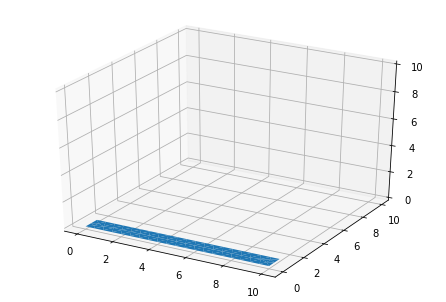

In [45]:
path = "../notebooks/beam.stl"

# Create a new plot
figure = pyplot.figure()
axes = mplot3d.Axes3D(figure)

# Load the STL files and add the vectors to the plot
your_mesh = mesh.Mesh.from_file(path)
axes.add_collection3d(mplot3d.art3d.Poly3DCollection(your_mesh.vectors))

# Auto scale to the mesh size
scale = your_mesh.points.flatten()

axes.auto_scale_xyz(scale, scale, scale)

# Show the plot to the screen
pyplot.show()

### Truss Mesh Generation Try 1:

#### Packages needed

In [7]:
import matplotlib.pyplot as plt
import numpy as np

#### Mesh gen.

[array([0.     , 0.90909, 1.81818, 2.72727, 3.63636, 4.54545, 5.45454,
       6.36363, 7.27272, 8.18181, 9.0909 , 9.99999])]
[0, 1]


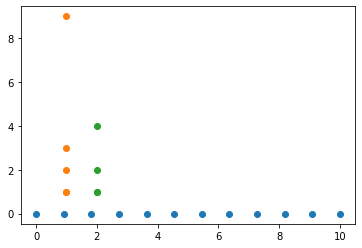

In [35]:
x=[np.arange(0,10,0.90909)]
y=[0, 1]

print(x)
print(y)

for xe, ye in zip(x, y):
    plt.scatter([xe], [ye])

# def connectpoints(x,y,p1,p2):
#     x1, x2 = x[p1], x[p2]
#     y1, y2 = y[p1], y[p2]
#     plt.plot([x1,x2],[y1,y2],'k-')

# connectpoints(x,y,0,2)
# connectpoints(x,y,2,3)

# plt.axis('equal')
# plt.show()

y = [(1,1,2,3,9),(1,1,2,4)]
x = [1,2]

for xe, ye in zip(x, y):
    plt.scatter([xe] * len(ye), ye)

### Truss Mesh Generation Try 2: NGSolve

#### Packages needed

In [3]:
from netgen.geom2d import unit_square, MakeCircle, SplineGeometry
from netgen.meshing import Element0D, Element1D, Element2D, MeshPoint, FaceDescriptor, Mesh
from netgen.csg import *
import netgen.gui


ImportError: DLL load failed while importing libngpy: The specified module could not be found.

#### Mesh gen.

In [8]:
quads = True
N=5

# create an empty mesh and initialize the geometry and the dimension:
mesh = Mesh()
mesh.SetGeometry(unit_square)
mesh.dim = 2

# add all mesh points that we will need for the final mesh:
pnums = []
for i in range(N + 1):
    for j in range(N + 1):
        pnums.append(mesh.Add(MeshPoint(Pnt(i / N, j / N, 0))))

# add boundary elements and boundary conditions:
mesh.Add (FaceDescriptor(surfnr=1,domin=1,bc=1)) ## must be added before next for loop!!!

# add the area elements:        
mesh.SetMaterial(1, "mat")
for j in range(N):
    for i in range(N):
        if quads:
            mesh.Add(Element2D(1, [pnums[i + j * (N + 1)], pnums[i + (j + 1) * (N + 1)], pnums[i + 1 + (j + 1) * (N + 1)], pnums[i + 1 + j * (N + 1)]]))
        else:
            mesh.Add(Element2D(1, [pnums[i + j * (N + 1)], pnums[i + (j + 1) * (N + 1)], pnums[i + 1 + j * (N + 1)]]))
            mesh.Add(Element2D(1, [pnums[i + (j + 1) * (N + 1)], pnums[i + 1 + (j + 1) * (N + 1)], pnums[i + 1 + j * (N + 1)]]))

# horizontal boundary elements:
for i in range(N):
   mesh.Add(Element1D([pnums[N + i * (N + 1)], pnums[N + (i + 1) * (N + 1)]], index=1))
   mesh.Add(Element1D([pnums[0 + i * (N + 1)], pnums[0 + (i + 1) * (N + 1)]], index=1))

# vertical boundary elements:
for i in range(N):
   mesh.Add(Element1D([pnums[i], pnums[i + 1]], index=1))
   mesh.Add(Element1D([pnums[i + N * (N + 1)], pnums[i + 1 + N * (N + 1)]], index=1))
        
# # for visualization we need a NGSolve mesh
# Draw(mesh)

AttributeError: 'netgen.libngpy._meshing.Mesh' object has no attribute 'Draw'

### Truss Mesh Analysis for Validation via TrussPy

In [4]:
import sys
!{sys.executable} -m pip install -q -U trusspy
import trusspy as tp


         _____                  ______      
        |_   _|                 | ___ \     
          | |_ __ _   _ ___ ___ | |_/ /   _ 
          | | '__| | | / __/ __||  __/ | | |
          | | |  | |_| \__ \__ \| |  | |_| |
          \_/_|   \__,_|___/___/\_|   \__, |
                                       __/ |
                                      |___/ 
        
        TrussPy - Object Oriented Truss Solver for Python
                  Version 2018.08 (Build 20180829)

        Author: Dutzler A.
                Graz University of Technology, 2018
                
        TrussPy  Copyright (C) 2018  Andreas Dutzler
        This program comes with ABSOLUTELY NO WARRANTY; 
        for details type `trusspy.show_w()'.
        This is free software, and you are welcome to redistribute it
        under certain conditions; type `trusspy.show_c()' for details.
        

# Initialize Model
* loading Managers

    - finished.



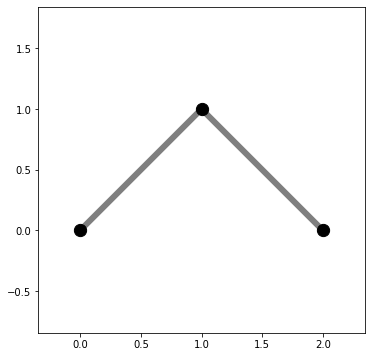

In [16]:
M = tp.Model()

with M.Nodes as MN:
    MN.add_node( 1, coord=( 0, 0, 0))
    MN.add_node( 2, coord=( 1, 0, 1))
    MN.add_node( 3, coord=( 2, 0, 0))

with M.Elements as ME:
    ME.add_element( 1, conn=(1,2), gprop=[1] )
    ME.add_element( 2 ,conn=(2,3), gprop=[1] )


#     E = 1     # elastic modulus
#     ME.assign_material( 'all', [E])

# with M.Boundaries as MB:
#     MB.add_bound_U( 1, (0,0,0) )
#     MB.add_bound_U( 2, (0,0,1) )
#     MB.add_bound_U( 3, (0,0,0) )

# with M.ExtForces as MF:
#     MF.add_force( 2, ( 0, 0,-1) )


# M.build()
# M.run()

M.plt_nodes(config='undeformed')
M.plt_elements(config='undeformed')

In [17]:
jupyter nbextension install --user --py ngsolve

SyntaxError: invalid syntax (<ipython-input-17-b5a71adcfaae>, line 1)